<a href="https://colab.research.google.com/github/Alexis-pr/Practicas_IA/blob/main/ttech_reto1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data elegida es la de dataset_agricola_con_errores.csv


1. Se desea predecir por cultivo cuanta cantidad de fertilizante en kilogramo se gasta por rendimiento por hectarea

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA



# Cargar los Datos

In [ ]:
Data = pd.read_csv('dataset_agricola_con_errores.csv')
Data

In [ ]:
#llamado del data donde me muestra los valores Nulos con su posicion x columna
Data.isnull().sum()
#Data[Data.isnull().any(axis=1)]
Data

,Cultivo,Región,Nivel de Productividad,Tamaño de la Parcela (ha),Cantidad de Fertilizante (kg),Rendimiento por Hectárea (toneladas),Costo de Producción por Hectárea ($),Costos Totales de Producción ($),Año de Cosecha,"Rentabilidad (Rentable=1, No Rentable=0)"
0,3,3,0,92.0,762.0,9.650000,-20666.548798,50013.087888,2019,0
1,0,0,0,7.0,582.0,11.370000,12286.240852,58927.337750,2021,1
2,2,1,1,35.0,901.0,9.210000,1431.204262,47732.698389,2019,0
3,3,1,1,55.0,772.0,8.930000,-6322.393303,46281.541434,2016,1
4,6,1,1,92.0,701.0,6.512188,-20666.548798,52293.477388,2016,0
...,...,...,...,...,...,...,...,...,...,...
995,2,1,0,48.0,663.0,1.890000,8409.442070,33625.244618,2016,0
996,4,3,1,68.0,87.0,10.130000,-11362.231720,52500.785524,2017,0
997,0,1,0,47.0,390.0,11.740000,-3220.954277,60844.938011,2021,1
998,5,0,0,25.0,974.0,5.450000,5308.003044,33625.244618,2016,0


# Exploración de Datos del Dataframe

In [ ]:
Data['Tamaño de la Parcela (ha)'] = pd.to_numeric(Data['Tamaño de la Parcela (ha)'], errors='coerce')
mediana = Data['Tamaño de la Parcela (ha)'].median()
Data['Tamaño de la Parcela (ha)'].fillna(mediana, inplace=True)



In [ ]:
Data['Nivel de Productividad']
print(Data['Nivel de Productividad'])

0      0
1      0
2      1
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: Nivel de Productividad, Length: 1000, dtype: int64


In [ ]:
Data['Rendimiento por Hectárea (toneladas)'] = pd.to_numeric(Data['Rendimiento por Hectárea (toneladas)'], errors='coerce')
media = Data['Rendimiento por Hectárea (toneladas)'].mean()
Data['Rendimiento por Hectárea (toneladas)'].fillna(media, inplace=True)

In [ ]:
Data['Costos Totales de Producción ($)'] = pd.to_numeric(Data['Costos Totales de Producción ($)'], errors='coerce')
media = Data['Costos Totales de Producción ($)'].mean()
Data['Costos Totales de Producción ($)'].fillna(media, inplace=True)
#Fixed typo to use pd.to_numeric to convert the column to numeric type


In [ ]:
Data['Cantidad de Fertilizante (kg)'].fillna(Data['Cantidad de Fertilizante (kg)'].median(), inplace=True)

# Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión

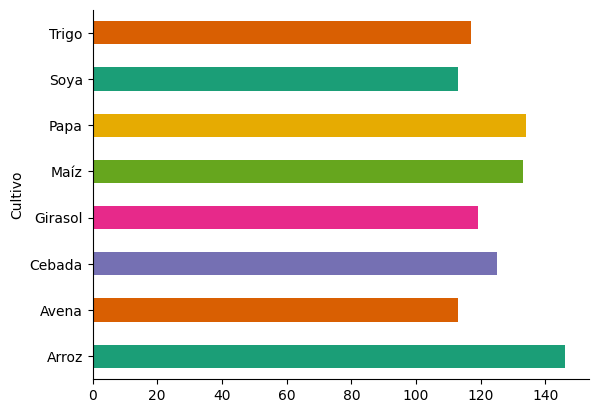

In [ ]:
# @title Cultivo

Data.groupby('Cultivo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

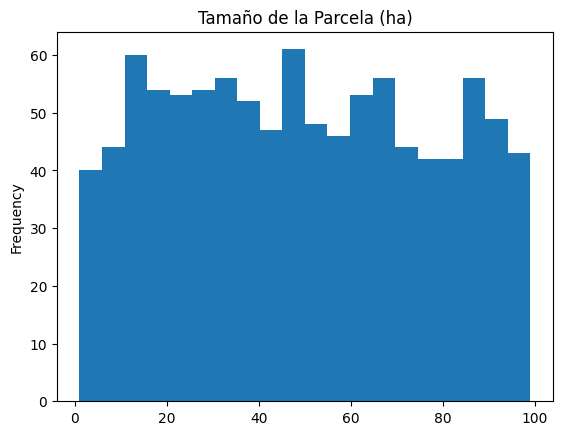

In [ ]:
# @title Tamaño de la Parcela (ha)
Data['Tamaño de la Parcela (ha)'].plot(kind='hist', bins=20, title='Tamaño de la Parcela (ha)')
plt.gca().spines[['top', 'right',]]

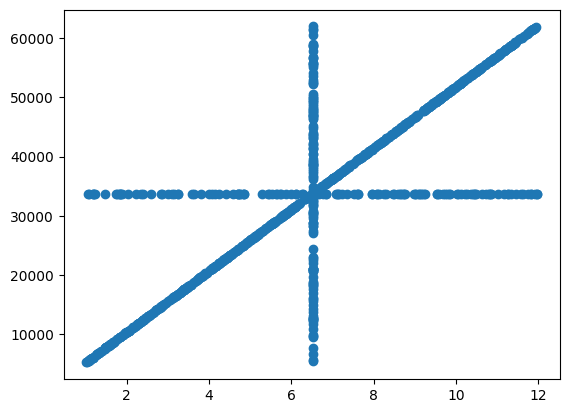

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Data['Rendimiento por Hectárea (toneladas)'], Data['Costos Totales de Producción ($)'])
plt.show()

# Aplicación de técnicas de One-hot encoding, Label encoding, y Ordinal encoding.

In [ ]:
# one hot encoding using OneHotEncoder
#####
#No ejecutar
#####
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False returns a dense array
encoded_data = encoder.fit_transform(Data[['Nivel de Productividad']]) # Input needs to be a 2D array
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Nivel de Productividad']))
print(encoded_df)



     Nivel de Productividad_Alto  Nivel de Productividad_Bajo  \
0                            0.0                          1.0   
1                            0.0                          0.0   
2                            1.0                          0.0   
3                            1.0                          0.0   
4                            1.0                          0.0   
..                           ...                          ...   
995                          0.0                          0.0   
996                          1.0                          0.0   
997                          0.0                          1.0   
998                          0.0                          1.0   
999                          0.0                          1.0   

     Nivel de Productividad_Medio  
0                             0.0  
1                             1.0  
2                             0.0  
3                             0.0  
4                             0.0  
.. 

In [ ]:
#### No ejecutar
######

# Crear un objeto OrdinalEncoder
encoderOR = OrdinalEncoder(categories=[['Bajo', 'Medio', 'Alto']])

# Aplicar el encoding a la columna de nivel educativo
Data['Nivel de Productividad'] = label_encoder.fit_transform(Data['Nivel de Productividad'])


Data['Nivel de Productividad']
print(Data['Nivel de Productividad'])

0      0
1      0
2      1
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: Nivel de Productividad, Length: 1000, dtype: int64


# Cálculo y visualización de matrices de correlación.

<Axes: >

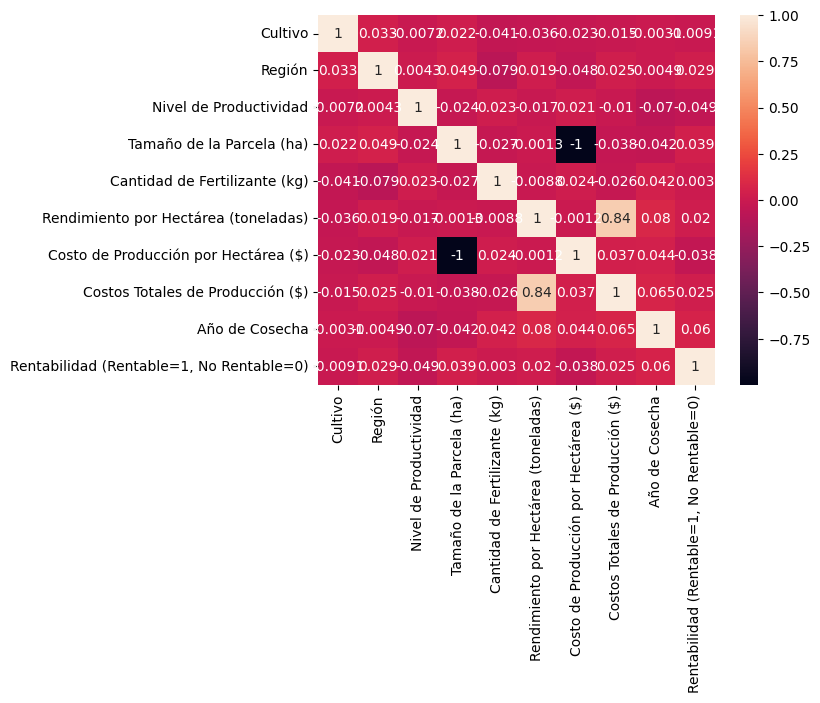

In [ ]:
Ind_Corre_Matriz = Data.corr()
sns.heatmap(Ind_Corre_Matriz, annot=True)

In [ ]:
Ind_Corre_person1 = pearsonr(Data['Cultivo'], Data['Cantidad de Fertilizante (kg)'])

# Aplicación de PCA para reducir la dimensionalidad de datasets